## Задание для 11 семинара.

f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1.   Определить корни
2.   Найти интервалы, на которых функция возрастает
1.   Найти интервалы, на которых функция убывает
2.   Построить график
1.   Вычислить вершину
2.   Определить промежутки, на котором f > 0
2.   Определить промежутки, на котором f < 0
















In [143]:
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

Выбираем интервал с точностью, и далее используем их для решения условий задачи, т.к. у данной функции интервалы - бесконечность.
*   интервал взят от -50 до 50 с точностью 100
*   интервал и точность изменяемые.




In [144]:
expr = -12*(x**4)*sin(cos(x))-18*x**3+5*x**2+10*x-30
precision = 100
start = -50
end = 50

xs = [x/precision for x in range(start*precision, end*precision + 1)]
ys = [expr.subs(x, value) for value in xs]
points = list(zip(xs, ys))

Выполняем 1 условие задачи - Определить корни.
*   но находится что-то другое ☹💢



In [145]:
solveset(-12*(x**4)*sin(cos(x))-18*x**3+5*x**2+10*x-30, x, domain=Reals)

ConditionSet(x, Eq(-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30, 0), Reals)

Выполняем 2 и 3 условия задачи - Нахождение интервалов, где функция убывает и возрастает.

In [146]:
points = list(zip(xs, ys))
increasing, decreasing = [], []
flag_increase = True
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter + 1][1] > points[counter][1]:
            counter += 1
        if counter != 0:
            increasing.append([points[0][0], points[counter][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter + 1][1] < points[counter][1]:
            counter += 1
        if counter != 0:
            decreasing.append([points[0][0], points[counter][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы возрастания:")
print(*increasing)
print("Интервалы убывания:")
print(*decreasing)


Интервалы возрастания:
[-50.0, -47.26] [-44.12, -40.99] [-37.85, -34.74] [-31.6, -28.49] [-25.35, -22.27] [-19.13, -16.08] [-12.94, -9.98] [-6.83, -4.17] [-0.39, 0.45] [1.7, 3.82] [7.0, 9.88] [13.01, 16.03] [19.17, 22.24] [25.38, 28.48] [31.61, 34.73] [37.87, 40.98] [44.13, 47.25]
Интервалы убывания:
[-47.26, -44.12] [-40.99, -37.85] [-34.74, -31.6] [-28.49, -25.35] [-22.27, -19.13] [-16.08, -12.94] [-9.98, -6.83] [-4.17, -0.39] [0.45, 1.7] [3.82, 7.0] [9.88, 13.01] [16.03, 19.17] [22.24, 25.38] [28.48, 31.61] [34.73, 37.87] [40.98, 44.13] [47.25, 50.0]


Выполняем 4 условие задачи - Построить график.  

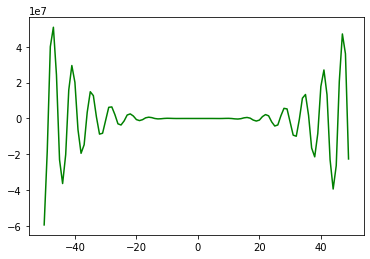

In [147]:
x = [-12*x**4*sin(cos(x))-18*x**3+5*x**2+10*x-30 for x in range(-50, 50)]
y = [y for y in range(-50, 50)]
plt.plot(y, x, 'g')
plt.show()

Выполняем 5 условие задачи - Вычислить вершину.  


In [148]:
points = list(zip(xs, ys))
extrema = []
flag_incr = True
prior = points[0]
count = 0
for current in points[1:]:
    if (flag_incr and prior[1] > current[1]) or (not flag_incr and prior[1] < current[1]):
        prior = current
        continue
    else:
        extrema.append(prior)
        prior = current
        flag_incr = not flag_incr    
    count +=1 

print(f'~Вершины(найдено {count}):')
print(*extrema)

~Вершины(найдено 34):
(-50.0, -59390247.8989142) (-47.26, 51982079.1923933) (-44.12, -36472115.4824706) (-40.99, 29547991.2736265) (-37.85, -19589163.6704127) (-34.74, 15309045.7075205) (-31.6, -9385314.75859711) (-28.49, 6971839.39794664) (-25.35, -3809716.06844547) (-22.27, 2621306.90006970) (-19.13, -1189754.32877340) (-16.08, 719825.604914624) (-12.94, -230227.659390767) (-9.98, 107677.979885801) (-6.83, -13820.5103804871) (-4.17, 3111.34748026531) (-0.39, -32.2934502471160) (0.45, -26.5133423096216) (1.7, -74.1062343439542) (3.82, 872.254954283837) (7.0, -25610.4912765752) (9.88, 72634.2724507631) (13.01, -308671.572492007) (16.03, 571129.592376197) (19.17, -1442156.06243368) (22.24, 2224990.51810836) (25.38, -4396822.35816420) (28.48, 6140383.71420007) (31.61, -10521289.5957027) (34.73, 13801346.3697034) (37.87, -21541971.0065093) (40.98, 27069484.4154352) (44.13, -39563027.3571410) (47.25, 48184671.6685169)


Выполняем 6 и 7 условия задачи - Определение промежуток, на которых f > 0 и f < 0


In [149]:
points = list(zip(xs, ys))
above, below = [], []
flag_increase = False
while len(points) >= 2:
    counter = 0
    if flag_increase:
        while points[counter][0] < end and points[counter][1] > 0:
            counter += 1
        if counter != 0:
            above.append([points[0][0], points[counter - 2][0]])
        flag_increase = False
    else:
        while points[counter][0] < end and points[counter][1] < 0:
            counter += 1
        if counter != 0:
            below.append([points[0][0], points[counter - 2][0]])
        flag_increase = True
    del points[:counter]

print("Интервалы, на котором f > 0:")
print(*above)
print("Интервалы, на котором f < 0:")
print(*below)

Интервалы, на котором f > 0:
[-48.72, -45.53] [-42.44, -39.25] [-36.17, -32.96] [-29.89, -26.66] [-23.62, -20.36] [-17.36, -14.04] [-11.13, -7.67] [-5.02, -1.35] [2.28, 4.37] [8.04, 10.85] [14.25, 17.18] [20.5, 23.48] [26.76, 29.78] [33.04, 36.07] [39.31, 42.36] [45.59, 48.65]
Интервалы, на котором f < 0:
[-50.0, -48.74] [-45.51, -42.46] [-39.23, -36.19] [-32.94, -29.91] [-26.64, -23.64] [-20.34, -17.38] [-14.02, -11.15] [-7.65, -5.04] [-1.33, 2.26] [4.39, 8.02] [10.87, 14.23] [17.2, 20.48] [23.5, 26.74] [29.8, 33.02] [36.09, 39.29] [42.38, 45.57] [48.67, 49.98]
